### 1. Data processing

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_network = pd.read_csv("./data/elliptic_txs_edgelist.csv")
df_classes = pd.read_csv("./data/elliptic_txs_classes.csv")

#### 1.1 Bitcoin data classification. 
#### The data was classified into three categories: Ilicit, Licit, and Unknown

In [40]:
## change classes names
df_classes.loc[df_classes['class'] == '1', 'class'] = 'Ilicit'
df_classes.loc[df_classes['class'] == '2', 'class'] = 'Licit'
df_classes.loc[df_classes['class'] == 'unknow', 'class'] = 'unknow'

group_class = df_classes.groupby('class').count()
#plt.barh(['Ilicit', 'Licit','unknown'], group_class['txId'].values, color=['orange', 'r', 'g'] )

In [4]:
classes_dict = df_classes.set_index('txId').T.to_dict('list')

In [45]:
print("2984918 is in", classes_dict[2984918])
print("106651741 is in", classes_dict[245736770])
#print("245736770 is in", classes_dict[245736770])

2984918 is in ['Licit']
106651741 is in ['unknown']


In [42]:
print("355174807 is in", classes_dict[355174807])
print("355176021 is in", classes_dict[355176021])
print("355176026 is in", classes_dict[355176026])

355174807 is in ['unknown']
355176021 is in ['unknown']
355176026 is in ['unknown']


In [6]:
group_class

,txId
class,
Ilicit,4545
Licit,42019
unknown,157205


#### 1.2 sample network graph, sample size is 500 connections

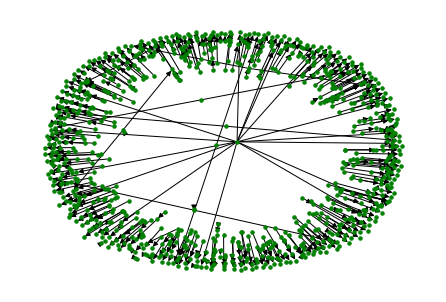

In [5]:
graph = nx.from_pandas_edgelist(df_network[5000:5500], source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)
nx.draw(graph, with_labels=False, pos=pos, node_size = 12, node_color='g', alpha=1)

In [66]:
len(graph.edges())
len(graph.nodes())

887

### 2. network analysis

### The whole Bitcoin network graph
#### Get the degree for each node, and sort the nodes from the largest degree (2984918: 473), to the smallest ones. The node with the largest degree has 473 direct connections with others. 


In [7]:
graph = nx.from_pandas_edgelist(df_network, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())

####  2.1 Below is a sample ilicit bitcoin network graph. The sample saize is 26 ilicit actors, and 15 ties.

In [8]:
class_ilicit = df_classes.loc[(df_classes['class'] == 'Ilicit'), 'txId']
#class_ilicit[:10]

In [9]:
sample_ilicit_edges = df_network.loc[df_network['txId1'].isin(class_ilicit)]
#print(sample_ilicit_edges[:10])

In [12]:
plt.rcParams['figure.figsize'] = (10, 10)
graph_ilicit = nx.from_pandas_edgelist(sample_ilicit_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
#pos = nx.spring_layout(graph_ilicit)
#nx.draw(graph_ilicit, with_labels=False, pos=pos, node_size=50, node_color='g', alpha=1)

#plt.title('Ilicit Bitcoin network graph', fontsize = 20)
#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
#plt.axis('off')
#plt.show()


In [13]:
len(graph_ilicit.nodes())

3988

In [14]:
len(graph_ilicit.edges())

3371

In [18]:
degree_ilicit = {}
for node in graph_ilicit.nodes():
    degree_ilicit[node]=graph_ilicit.degree(node)
    
    #print(node,graph.degree(node))
degree_ilicit_sort = dict(sorted(degree_ilicit.items(), key=lambda item: item[1], reverse = True))
degree_ilicit_sort

{86738813: 3,
 86962611: 2,
 86959674: 2,
 245420039: 1,
 245419213: 1,
 244662723: 1,
 244662716: 1,
 245146107: 1,
 245418908: 1,
 245231973: 1,
 245231971: 1,
 245140933: 1,
 245424768: 1,
 86739424: 1,
 87690267: 1,
 45751341: 1,
 87626508: 1,
 87626486: 1,
 279004203: 1,
 86912548: 1,
 86738862: 1,
 86705550: 1,
 86706819: 1,
 86706815: 1,
 86739423: 1,
 258961960: 1}

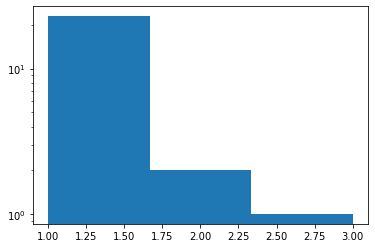

In [19]:
degree_ilicit_list = degree_ilicit_sort.values()
degree_ilicit_list = [item for item in degree_ilicit_list if item > 0 ]
plt.hist(degree_ilicit_list, bins = np.max(degree_ilicit_list))
plt.yscale('log')

#### 2.2 This is the overall ilicit nodes analysis
#### For the whole ilicit bitcoin network, there are 3988 nodes, and 3371 edges.

In [16]:
Total_ilicit_edges = df_network[:].loc[df_network[:]['txId1'].isin(class_ilicit)]
graph_ilicit_all = nx.from_pandas_edgelist(Total_ilicit_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.Graph())

In [21]:
len(graph_ilicit_all.edges())

3371

In [22]:
len(graph_ilicit_all.nodes())

3988

In [29]:
degree_centrality_ilicit = nx.degree_centrality(graph_ilicit_all)
#degree_centrality_ilicit
degree_centrality_ilicit_list=list(degree_centrality_ilicit.values())
#degree_centrality_ilicit_list

In [23]:
print("The largest Ilicit nodes degree centality:", np.max(degree_centrality_ilicit_list) )
print("Ilicit nodes degree centality 25th percentile:", np.percentile(degree_centrality_ilicit_list,25)  )
print("Ilicit nodes degree centality median:", np.percentile(degree_centrality_ilicit_list,50) )
print("Ilicit nodes degree centality 75th percentile:", np.percentile(degree_centrality_ilicit_list,75) )

The largest Ilicit nodes degree : 0.017055430147980936
Ilicit nodes degree 25th percentile: 0.00025081514923501377
Ilicit nodes degree median: 0.00025081514923501377
Ilicit nodes degree 75th percentile: 0.0005016302984700275


In [26]:
closeness_centrality_ilicit = nx.closeness_centrality(graph_ilicit_all)
closeness_centrality_ilicit_list=list(closeness_centrality_ilicit.values())
#closeness_centrality_ilicit_list

In [25]:
print("The largest Ilicit nodes closeness centality:", np.max(closeness_centrality_ilicit_list) )
print("Ilicit nodes closeness centality 25th percentile:", np.percentile(closeness_centrality_ilicit_list,25) )
print("Ilicit nodes closeness degree centality median:", np.percentile(closeness_centrality_ilicit_list,50) )
print("Ilicit nodes closeness centality 75th percentile:", np.percentile(closeness_centrality_ilicit_list,75) )

The largest Ilicit nodes closeness centality: 0.01654775611097513
Ilicit nodes closeness centality 25th percentile: 0.0005016302984700275
Ilicit nodes closeness degree centality median: 0.000976145445671405
Ilicit nodes closeness centality 75th percentile: 0.0022718763517664293


In [30]:
betweenness_centrality_ilicit = nx.betweenness_centrality(graph_ilicit_all)
betweenness_centrality_ilicit_list=list(betweenness_centrality_ilicit.values())
#betweenness_centrality_ilicit_list

In [31]:
print("The largest Ilicit nodes betweenness centality:", np.max(betweenness_centrality_ilicit_list) )
print("Ilicit nodes betweenness centality 25th percentile:", np.percentile(betweenness_centrality_ilicit_list,25) )
print("Ilicit nodes betweenness centality median:", np.percentile(betweenness_centrality_ilicit_list,50) )
print("Ilicit nodes betweenness centality 75th percentile:", np.percentile(betweenness_centrality_ilicit_list,75) )

The largest Ilicit nodes betweenness centality: 0.0012774834821297667
Ilicit nodes betweenness centality 25th percentile: 0.0
Ilicit nodes betweenness centality median: 0.0
Ilicit nodes betweenness centality 75th percentile: 5.348541817605663e-07


In [ ]:
degree_centrality_ilicit = nx.degree_centrality(graph_ilicit_all)
#degree_centrality_ilicit
degree_centrality_ilicit_list=list(degree_centrality_ilicit.values())
#degree_centrality_ilicit_list
print("The largest Ilicit nodes degree centality:", np.max(degree_centrality_ilicit_list) )
print("Ilicit nodes degree centality 25th percentile:", np.percentile(degree_centrality_ilicit_list,25) )
print("Ilicit nodes degree centality median:", np.percentile(degree_centrality_ilicit_list,50) )
print("Ilicit nodes degree centality 75th percentile:", np.percentile(degree_centrality_ilicit_list,75) )

closeness_centrality_ilicit = nx.closeness_centrality(graph_ilicit_all)
closeness_centrality_ilicit_list=list(closeness_centrality_ilicit.values())
#closeness_centrality_ilicit_list
print("The largest Ilicit nodes closeness centality:", np.max(closeness_centrality_ilicit_list) )
print("Ilicit nodes closeness centality 25th percentile:", np.percentile(closeness_centrality_ilicit_list,25) )
print("Ilicit nodes closeness degree centality median:", np.percentile(closeness_centrality_ilicit_list,50) )
print("Ilicit nodes closeness centality 75th percentile:", np.percentile(closeness_centrality_ilicit_list,75) )

betweenness_centrality_ilicit = nx.betweenness_centrality(graph_ilicit_all)
betweenness_centrality_ilicit_list=list(betweenness_centrality_ilicit.values())
#betweenness_centrality_ilicit_list
print("The largest Ilicit nodes betweenness centality:", np.max(betweenness_centrality_ilicit_list) )
print("Ilicit nodes betweenness centality 25th percentile:", np.percentile(betweenness_centrality_ilicit_list,25) )
print("Ilicit nodes betweenness centality median:", np.percentile(betweenness_centrality_ilicit_list,50) )
print("Ilicit nodes betweenness centality 75th percentile:", np.percentile(betweenness_centrality_ilicit_list,75) )

#### 2.3 Below is the degree analysis. The actor (355174807), has the largest degrees (68).

In [22]:
degree_ilicit_all = {}
for node in graph_ilicit_all.nodes():
    degree_ilicit_all[node]=graph_ilicit_all.degree(node)
    
    #print(node,graph.degree(node))
degree_ilicit_all_sort = dict(sorted(degree_ilicit_all.items(), key=lambda item: item[1], reverse = True))
degree_ilicit_all_sort

{355174807: 68,
 339502544: 63,
 139273997: 59,
 355238405: 58,
 73160850: 49,
 339265345: 47,
 157929208: 40,
 246979389: 36,
 179113037: 32,
 246979279: 29,
 179039621: 27,
 179112629: 27,
 73282397: 25,
 4692401: 23,
 94654151: 22,
 339568317: 22,
 390599321: 22,
 69692260: 22,
 115723285: 20,
 94654119: 19,
 339120946: 18,
 339096338: 18,
 54242840: 18,
 115722990: 18,
 234672018: 17,
 372812256: 17,
 378409841: 15,
 101721963: 15,
 363773543: 15,
 234711161: 14,
 378593993: 14,
 372866784: 14,
 331065768: 13,
 168117086: 13,
 234559571: 12,
 372866542: 12,
 12779932: 12,
 94526849: 11,
 339093160: 11,
 339648620: 11,
 29778647: 11,
 209803647: 11,
 226716674: 10,
 226677699: 10,
 283172570: 10,
 70360850: 10,
 13735016: 10,
 157930723: 10,
 191631370: 9,
 339552839: 9,
 83057880: 9,
 99222895: 9,
 275155448: 9,
 275521193: 9,
 179111799: 8,
 378198994: 8,
 363342210: 8,
 209865237: 8,
 209485498: 8,
 99911404: 8,
 100036774: 8,
 315493331: 8,
 300413520: 8,
 299036077: 8,
 2991724

#### This is the log graph to show how degrees of all nodes allocated. We can see most actors have the degree of less than 10. Only four nodes have the degrees larger than 50.

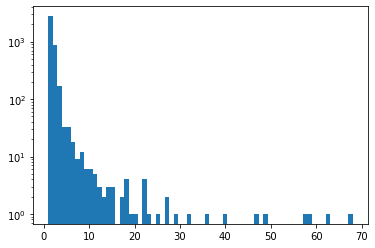

In [23]:
degree_ilicit_all_list = degree_ilicit_all_sort.values()
degree_ilicit_all_list = [item for item in degree_ilicit_all_list if item > 0 ]
plt.hist(degree_ilicit_all_list, bins = np.max(degree_ilicit_all_list))
plt.yscale('log')

#### The analysis below is finding the connections of the node (355174807) with the largest degree(68). In the whole picture, including licit, ilicit, and unknown nodes, the actor 355174807 has 142 in-degrees. It means, there are 142 ties of transactions from other actors to 355174807. 
#### The actor 355174807 only has one out-degree, the actor of the out-degree is 355176021.
#### The actor 355176021 only has one out-degree as well, the actor of the out-degree is 355176026. And this is the end of the subgraph, with no other transaction ties.
#### The right order for the transactions ties is: 142 nodes --> 355174807 --> 355176021 --> 355176026.

In [24]:
df_355174807_in = df_network.loc[df_network['txId2'] == 355174807]
df_355174807_in


,txId1,txId2
146023,355008037,355174807
146107,355092764,355174807
146205,355090888,355174807
146278,355007578,355174807
146355,355124089,355174807
...,...,...
150604,355102217,355174807
150610,355102377,355174807
150623,355128274,355174807
150652,355102455,355174807


In [25]:
df_355174807_out = df_network.loc[df_network['txId1'] == 355174807]
print(df_355174807_out)


            txId1      txId2
149301  355174807  355176021


In [26]:
df_355176021_out = df_network.loc[df_network['txId1'] == 355176021]
print(df_355176021_out)

            txId1      txId2
148950  355176021  355176026


In [27]:
frames = [df_355174807_in, df_355174807_out, df_355176021_out]

result = pd.concat(frames)
#print(result)

#### This is the network graph to show an example of subgroup of actor 355174807.

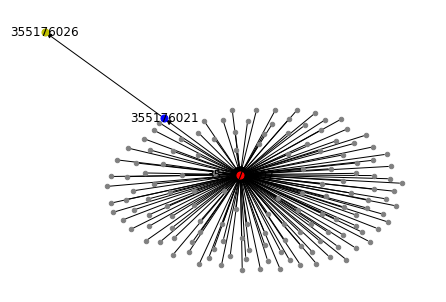

In [30]:
graph_result_ilicit_largest = nx.from_pandas_edgelist(result, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph_result_ilicit_largest)
nx.draw(graph_result_ilicit_largest, with_labels=False, pos=pos, node_size = 20, node_color='grey', alpha=1)
nx.draw(graph_result_ilicit_largest.subgraph(355174807), pos=pos,  with_labels=True, node_size = 50, node_color='red' )
nx.draw(graph_result_ilicit_largest.subgraph(355176021), pos=pos,  with_labels=True, node_size = 50, node_color='b')
nx.draw(graph_result_ilicit_largest.subgraph(355176026), pos=pos,  with_labels=True, node_size = 50, node_color='y')

In [31]:
df_355176026_out = df_network.loc[df_network['txId1'] == 355176026]
print(df_355176026_out)

Empty DataFrame
Columns: [txId1, txId2]
Index: []


#### 2.4 sample licit bitcoin network graph
#### ####  Below is a sample licit bitcoin network graph. The sample saize is 251 ilicit actors, and 143 ties.

In [31]:
class_licit = df_classes.loc[(df_classes['class'] == 'Licit'), 'txId']


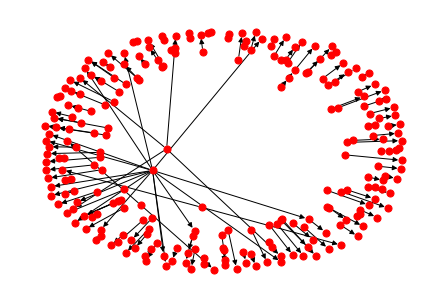

In [32]:
sample_licit_edges = df_network[:500].loc[df_network[:500]['txId1'].isin(class_licit)]

graph_licit_sample = nx.from_pandas_edgelist(sample_licit_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph_licit_sample)
nx.draw(graph_licit_sample, with_labels=False, pos=pos, node_size = 50, node_color='r', alpha=1)

In [33]:
len(graph_licit_sample.nodes())

251

In [34]:
len(graph_licit_sample.edges())

143

#### 2.5 whole licit bitcoin network graph
####  This is the overall licit nodes analysis
#### For the whole licit bitcoin network, there are 50379 nodes, and 49827 edges.

In [33]:
class_licit = df_classes.loc[(df_classes['class'] == 'Licit'), 'txId']

licit_edges = df_network[:].loc[df_network[:]['txId1'].isin(class_licit)]

graph_licit = nx.from_pandas_edgelist(licit_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())

In [34]:
len(graph_licit.nodes())

50379

In [35]:
len(graph_licit.edges())

49827

In [39]:
degree_centrality_licit = nx.degree_centrality(graph_licit)
#degree_centrality_licit
degree_centrality_licit_list=list(degree_centrality_licit.values())
#degree_centrality_licit_list
print("The largest licit nodes degree centality:", np.max(degree_centrality_licit_list) )
print("licit nodes degree centality 25th percentile:", np.percentile(degree_centrality_licit_list,25) )
print("licit nodes degree centality median:", np.percentile(degree_centrality_licit_list,50) )
print("licit nodes degree centality 75th percentile:", np.percentile(degree_centrality_licit_list,75) )
print("\n\n")

closeness_centrality_licit = nx.closeness_centrality(graph_licit)
closeness_centrality_licit_list=list(closeness_centrality_licit.values())
#closeness_centrality_licit_list
print("The largest licit nodes closeness centality:", np.max(closeness_centrality_licit_list) )
print("licit nodes closeness centality 25th percentile:", np.percentile(closeness_centrality_licit_list,25) )
print("licit nodes closeness degree centality median:", np.percentile(closeness_centrality_licit_list,50) )
print("licit nodes closeness centality 75th percentile:", np.percentile(closeness_centrality_licit_list,75) )

The largest licit nodes degree centality: 0.009389019016237246
licit nodes degree centality 25th percentile: 1.9849934495216167e-05
licit nodes degree centality median: 1.9849934495216167e-05
licit nodes degree centality 75th percentile: 3.9699868990432334e-05



The largest licit nodes closeness centality: 0.0016248428846248153
licit nodes closeness centality 25th percentile: 0.0
licit nodes closeness degree centality median: 1.9849934495216167e-05
licit nodes closeness centality 75th percentile: 3.308322415869361e-05


In [38]:
betweenness_centrality_licit = nx.betweenness_centrality(graph_licit)
betweenness_centrality_licit_list=list(betweenness_centrality_licit.values())
#betweenness_centralilicit_list
print("The largest licit nodes betweenness centality:", np.max(betweenness_centrality_licit_list) )
print("licit nodes betweenness centality 25th percentile:", np.percentile(betweenness_centrality_licit_list,25) )
print("licit nodes betweenness centality median:", np.percentile(betweenness_centrality_licit_list,50) )
print("licit nodes betweenness centality 75th percentile:", np.percentile(betweenness_centrality_licit_list,75) )

The largest licit nodes betweenness centality: 2.084209629641422e-06
licit nodes betweenness centality 25th percentile: 0.0
licit nodes betweenness centality median: 0.0
licit nodes betweenness centality 75th percentile: 3.940277208888216e-10


#### Below is the degree analysis. The actor (2984918), has the largest degrees (473).

In [38]:
degree_licit_all = {}
for node in graph_licit.nodes():
    degree_licit_all[node]=graph_licit.degree(node)
    
    #print(node,graph.degree(node))
degree_licit_all_sort = dict(sorted(degree_licit_all.items(), key=lambda item: item[1], reverse = True))
degree_licit_all_sort

{2984918: 473,
 89273: 289,
 3181: 113,
 7952: 100,
 565334: 91,
 488266: 89,
 5678249: 67,
 232438397: 61,
 12172125: 60,
 149158766: 58,
 19670253: 56,
 225859042: 53,
 106320422: 53,
 19170155: 52,
 3180883: 51,
 12117243: 51,
 29359565: 50,
 91961924: 49,
 91934616: 48,
 70245040: 46,
 73357055: 46,
 20521889: 45,
 12806606: 44,
 5689045: 43,
 12987200: 43,
 12780176: 43,
 12806113: 42,
 94256093: 42,
 459148: 41,
 149569098: 41,
 190450302: 40,
 13333148: 40,
 156313815: 40,
 399972831: 39,
 12649359: 39,
 1454780: 39,
 12665008: 38,
 73227485: 38,
 234890810: 37,
 16827115: 37,
 36838022: 37,
 11193869: 37,
 53063584: 37,
 38688623: 37,
 96576418: 36,
 3623625: 36,
 12781074: 35,
 35202200: 35,
 190829768: 34,
 180735: 34,
 21456350: 34,
 72753731: 34,
 106302011: 34,
 156328432: 34,
 111575373: 34,
 5684082: 33,
 4846284: 33,
 70449784: 33,
 12780542: 33,
 38538087: 33,
 34335946: 33,
 108292235: 33,
 64852016: 33,
 230473483: 32,
 4261635: 32,
 116898498: 31,
 9904238: 31,
 356

#### This is the log graph to show how degrees of all licit nodes allocated. We can see most actors have the degree of less than 50. Only four nodes have the degrees larger than100.

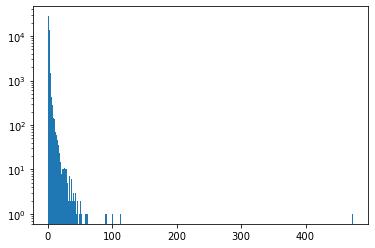

In [39]:
degree_licit_all_list = degree_licit_all_sort.values()
degree_licit_all_list = [item for item in degree_licit_all_list if item > 0 ]
plt.hist(degree_licit_all_list, bins = np.max(degree_licit_all_list))
plt.yscale('log')

#### The analysis below is finding the connections of the node (2984918) with the largest degree(473). In the whole picture, including licit, ilicit, and unknown nodes, the actor 2984918 has 472 out-degrees. It means, there are 473 ties of transactions from 2984918 to other actors.
#### The actor 2984918 only has one in-degree, the actor of the in-degree is 106651741. nd this is the end of the subgraph, with no other transaction ties.

#### The right order for the transactions ties is: 106651741 --> 2984918 --> 472 actors

In [40]:
df_2984918_in = df_network.loc[df_network['txId1'] == 2984918]
df_2984918_in

,txId1,txId2
110767,2984918,321536614
110780,2984918,372979935
110788,2984918,368738791
110793,2984918,372681524
110796,2984918,372878747
...,...,...
117722,2984918,317001228
117737,2984918,314843198
117740,2984918,372681544
117746,2984918,250231694


In [41]:
df_2984918_out = df_network.loc[df_network['txId2'] == 2984918]
df_2984918_out

,txId1,txId2
114197,106651741,2984918


In [42]:
df_106651741_out = df_network.loc[df_network['txId2'] == 106651741]
df_106651741_out

,txId1,txId2


In [43]:
frames_licit = [df_2984918_in, df_2984918_out]

result_licit = pd.concat(frames_licit)
len(result_licit)

473

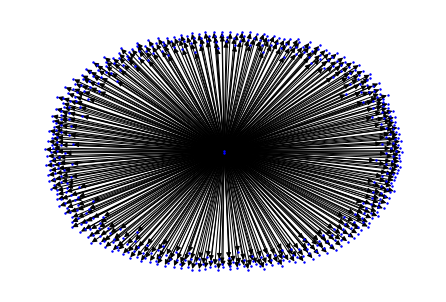

In [44]:
graph_result_licit_largest = nx.from_pandas_edgelist(result_licit, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph_result_licit_largest)
nx.draw(graph_result_licit_largest, with_labels=False, pos=pos, node_size = 2, node_color='b', alpha=1)


#nx.draw((graph_result_licit_largest.subgraph(2984918), pos=pos,  node_color='r' )
#nx.draw((graph_result_licit_largest.subgraph(106651741), pos=pos,  node_color='b')


#### The actor with the larget degree centrality is 2984918, which is same as the actor with the largest degree in the licit network.

In [10]:
graph_all = nx.from_pandas_edgelist(df_network, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())

In [12]:
degree_all= {}
for node in graph_all.nodes():
    degree_all[node]=graph_all.degree(node)
    
    #print(node,graph.degree(node))
degree_all_sort = dict(sorted(degree_all.items(), key=lambda item: item[1], reverse = True))
degree_all_sort

{2984918: 473,
 89273: 289,
 43388675: 284,
 68705820: 247,
 30699343: 241,
 96576418: 239,
 225859042: 212,
 279187194: 211,
 234890810: 199,
 196107869: 188,
 43397277: 182,
 68706499: 178,
 30179316: 177,
 269905668: 173,
 225711361: 167,
 96365231: 166,
 232438397: 161,
 99675435: 158,
 121654821: 156,
 355110272: 153,
 157929208: 152,
 90716926: 150,
 149158766: 148,
 2881273: 143,
 355174807: 143,
 372745794: 139,
 230658142: 134,
 70245040: 134,
 94621528: 132,
 30276715: 129,
 149691712: 129,
 339175100: 127,
 347550863: 126,
 209837677: 124,
 116898498: 124,
 22837784: 122,
 102570: 122,
 30151745: 121,
 2268197: 121,
 106320422: 120,
 12806113: 118,
 332771446: 116,
 149569098: 116,
 3181: 113,
 155821494: 113,
 38688623: 113,
 22837965: 110,
 12780176: 110,
 382997214: 109,
 91934616: 109,
 36364435: 108,
 19170155: 108,
 2758467: 106,
 111575373: 106,
 30861039: 105,
 73330801: 105,
 45766: 105,
 12172125: 103,
 14950377: 103,
 269905671: 102,
 163879834: 102,
 91882349: 10

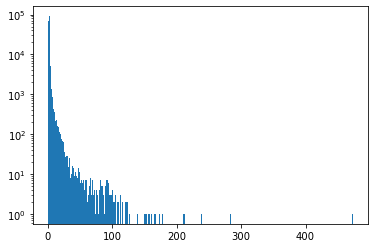

In [13]:
degree_all_list = degree_all_sort.values()
degree_all_list = [item for item in degree_all_list if item > 0 ]
plt.hist(degree_all_list, bins = np.max(degree_all_list))
plt.yscale('log')

In [11]:
nx.degree(graph_all)

DiDegreeView({230425980: 2, 5530458: 2, 232022460: 3, 232438397: 161, 230460314: 10, 230459870: 10, 230333930: 2, 230595899: 3, 232013274: 2, 232029206: 60, 232344069: 2, 27553029: 2, 36411953: 2, 230405052: 3, 34194980: 3, 5529846: 4, 3881097: 2, 232457116: 2, 230409257: 2, 32877982: 2, 230351738: 2, 195218118: 2, 88008478: 1, 232012569: 10, 232412408: 2, 232412405: 1, 232038018: 2, 232470342: 7, 2925426: 3, 230550393: 21, 232051089: 3, 232470704: 3, 233591710: 2, 234439913: 3, 232945017: 3, 94251207: 14, 6595740: 2, 79840192: 1, 212704383: 2, 212366182: 2, 69254632: 2, 230595355: 3, 166890641: 3, 82304496: 3, 232033533: 2, 230470022: 2, 230598493: 2, 43560505: 50, 14878322: 2, 230415750: 3, 232073372: 3, 75604335: 2, 230473487: 2, 7089694: 5, 231179595: 1, 3307463: 2, 230658679: 2, 232074274: 2, 5234549: 3, 231177927: 1, 232431877: 3, 2758467: 106, 81273879: 2, 232437171: 3, 3878856: 1, 3878886: 2, 231182296: 3, 14660781: 2, 13334987: 2, 5530452: 1, 230519287: 2, 194810163: 1, 230423

In [14]:
degree_centrality_all = nx.degree_centrality(graph_all)

In [15]:
degree_centrality_all_sort = dict(sorted(degree_centrality_all.items(), key=lambda item: item[1], reverse = True))
degree_centrality_all_sort

{2984918: 0.0023212673236229437,
 89273: 0.0014182796121078873,
 43388675: 0.0013937419025558478,
 68705820: 0.0012121628518707548,
 30699343: 0.0011827176004083075,
 96576418: 0.0011729025165874917,
 225859042: 0.001040398885006478,
 279187194: 0.00103549134309607,
 234890810: 0.000976600840171175,
 196107869: 0.000922617879156688,
 43397277: 0.0008931726276942405,
 68706499: 0.0008735424600526088,
 30179316: 0.0008686349181422009,
 269905668: 0.0008490047505005692,
 225711361: 0.0008195594990381218,
 96365231: 0.0008146519571277139,
 232438397: 0.0007901142475756742,
 99675435: 0.0007753916218444506,
 121654821: 0.0007655765380236347,
 355110272: 0.000750853912292411,
 157929208: 0.000745946370382003,
 90716926: 0.0007361312865611872,
 149158766: 0.0007263162027403714,
 2881273: 0.0007017784931883318,
 355174807: 0.0007017784931883318,
 372745794: 0.0006821483255467001,
 230658142: 0.0006576106159946605,
 70245040: 0.0006576106159946605,
 94621528: 0.0006477955321738448,
 30276715: 0

#### The actor 73279924 has the largest closeness centrality 0.0013436, which means, the actor 73279924 is much closer to the other actors.

In [52]:
import collections
closeness_centrality = nx.closeness_centrality(graph_all)
c = collections.Counter(closeness_centrality.values())
#c.most_common(50)

In [51]:
sorted_closeness_centrality = dict(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse = True))
sorted_closeness_centrality

{73279924: 0.0013435982296480303,
 45555339: 0.0012489702030842088,
 73405590: 0.0012259299803948512,
 70245040: 0.001193706135152973,
 96576418: 0.0011007844566372977,
 156313815: 0.0010859914195165087,
 133876531: 0.0010579483096344918,
 217133736: 0.0010475140749495314,
 94408492: 0.0010285883012019722,
 200990304: 0.0010264826065500342,
 91882349: 0.0010147158172127875,
 179084283: 0.0010026767345011037,
 201000368: 0.0010016119623294806,
 218468774: 0.0009928533125925084,
 121801433: 0.000966543269412803,
 196107869: 0.0009402032376689829,
 156328432: 0.000939905783489078,
 121225693: 0.0009338515634743247,
 30699343: 0.0009313290660196615,
 200649629: 0.0009276899917044872,
 3510576: 0.0009243829617980613,
 70245035: 0.0009142409470414211,
 66421580: 0.0009053933693142759,
 234890810: 0.0008871003210899068,
 232438397: 0.0008865586359501648,
 156341160: 0.0008768904766084375,
 30179316: 0.0008639700568757142,
 156189849: 0.0008542279751952951,
 73327121: 0.0008516545130889281,
 1

#### The betweenness centralities are as follows. We sorted them from the in a desending order. 
#### We can see the actor 245736770, has the largest betweenness centrality, which is 9.37776499093078e-06.
#### There are 21 actors have very close betweenness centrality.

In [53]:
betweenness_centrality_all = nx.betweenness_centrality(graph_all)

In [54]:
betweenness_centrality_all

{230425980: 3.3717720114498817e-10,
 5530458: 1.9267268636856467e-10,
 232022460: 7.225225738821175e-10,
 232438397: 5.6718022049746224e-08,
 230460314: 4.0346578014560154e-10,
 230459870: 5.925082096258573e-09,
 230333930: 0.0,
 230595899: 9.224204859895034e-09,
 232013274: 0.0,
 232029206: 2.9454836928594324e-08,
 232344069: 0.0,
 27553029: 1.6858860057249408e-10,
 36411953: 2.89009029552847e-10,
 230405052: 4.816817159214117e-10,
 34194980: 1.9267268636856467e-10,
 5529846: 5.78018059105694e-10,
 3881097: 9.633634318428234e-11,
 232457116: 7.225225738821175e-11,
 230409257: 2.89009029552847e-10,
 32877982: 2.89009029552847e-10,
 230351738: 0.0,
 195218118: 2.143483635850282e-09,
 88008478: 0.0,
 232012569: 7.730991540538658e-09,
 232412408: 4.816817159214117e-11,
 232412405: 0.0,
 232038018: 0.0,
 232470342: 1.0837838608231763e-08,
 2925426: 3.3717720114498817e-10,
 230550393: 0.0,
 232051089: 4.816817159214117e-11,
 232470704: 0.0,
 233591710: 2.8178380381402583e-09,
 234439913: 3.

In [57]:
sorted_betweenness_centrality_all = dict(sorted(betweenness_centrality_all.items(), key=lambda item: item[1], reverse = True))
sorted_betweenness_centrality_all

{245736770: 9.37776499093078e-06,
 245736765: 9.377740906844984e-06,
 245736776: 9.377740906844984e-06,
 245736761: 9.377668654587596e-06,
 245736986: 9.377668654587596e-06,
 245736992: 9.377548234158615e-06,
 245736242: 9.377548234158615e-06,
 245737186: 9.377379645558043e-06,
 245736227: 9.377379645558043e-06,
 35999774: 9.377162888785878e-06,
 245737191: 9.377162888785878e-06,
 245735781: 9.376897963842121e-06,
 245737197: 9.376897963842121e-06,
 245737200: 9.376584870726772e-06,
 245735777: 9.376584870726772e-06,
 245735282: 9.376223609439831e-06,
 245737207: 9.376223609439831e-06,
 245735174: 9.375814179981299e-06,
 245737214: 9.375814179981299e-06,
 245735166: 9.375356582351173e-06,
 245737215: 9.375356582351173e-06,
 245735156: 9.374850816549455e-06,
 245737225: 9.374850816549455e-06,
 58470523: 9.374296882576146e-06,
 245734811: 9.374296882576146e-06,
 245737330: 9.373694780431245e-06,
 58474280: 9.373694780431245e-06,
 245737635: 9.37304451011475e-06,
 245734805: 9.37304451011